In [1]:
# import some common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
#load data
accts = pd.read_csv('Case_AccountData.csv')
accts.head()

,AccountID,CustomerType,DevLanguage
0,935afc18-43be-43b9-9d39-6469f18a9d32,Enterprise,dotnet
1,153f08c5-7a39-46a5-9477-0cdde5c3c9e7,SMB,dotnet
2,4a7e4e7d-2182-491c-b99c-83da1172ac32,Credit_Program,dotnet
3,fbe40696-9366-433e-bdfa-4b207bf7f3d2,Credit_Program,dotnet
4,ef997ccf-b8ca-4a5d-af8d-211d1042cb52,Credit_Program,dotnet


<Axes: xlabel='CustomerType'>

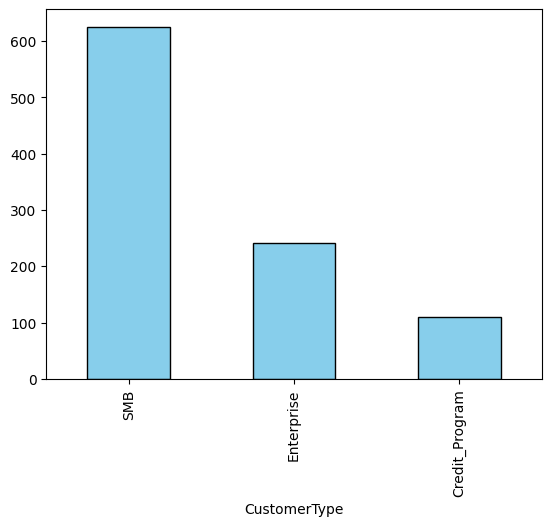

In [11]:
value_counts = accts['CustomerType'].value_counts()
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

<Axes: xlabel='DevLanguage'>

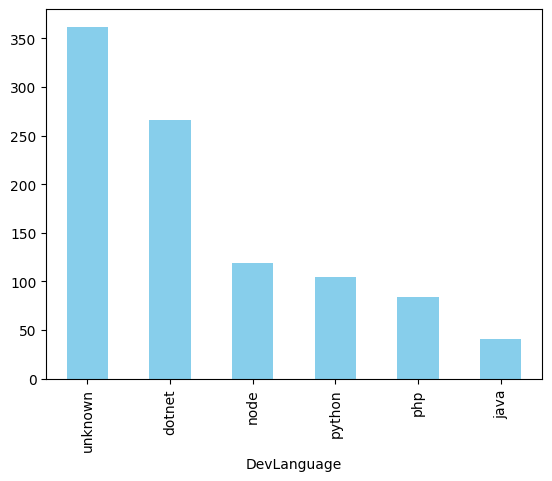

In [23]:
value_counts = accts['DevLanguage'].value_counts()
value_counts.plot(kind='bar', color='skyblue')

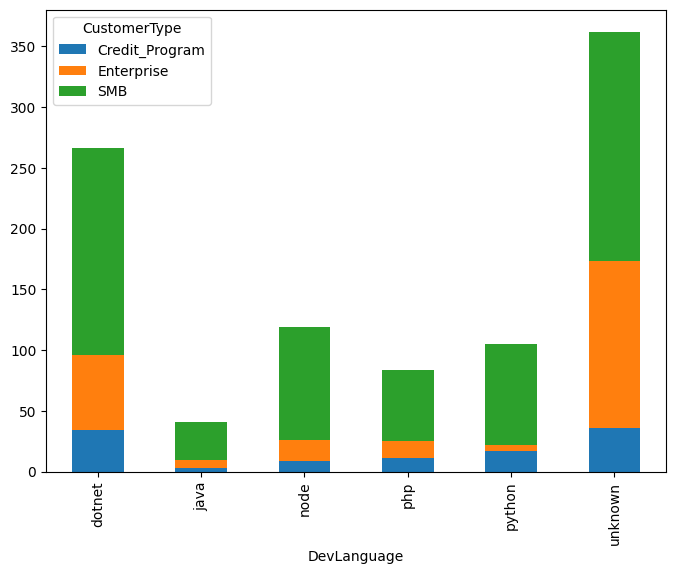

In [19]:
grouped_data = accts.groupby(['DevLanguage', 'CustomerType']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.show()

<Axes: xlabel='DevLanguage'>

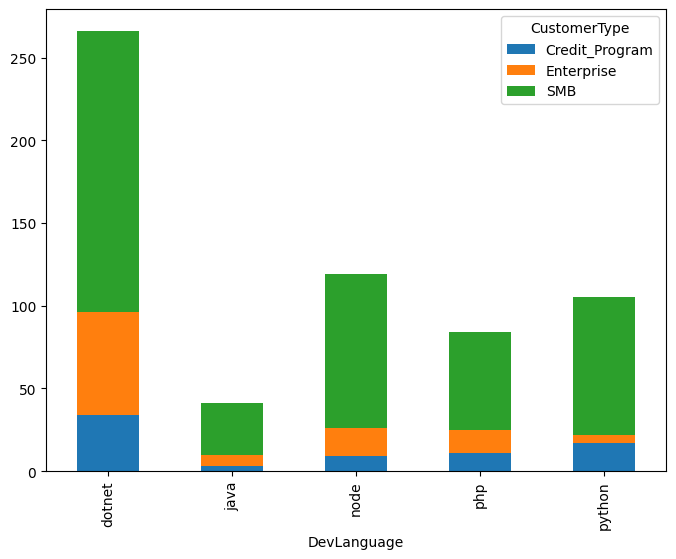

In [22]:
accts_unknown = accts[accts["DevLanguage"] != "unknown"]
grouped_data = accts_unknown.groupby(['DevLanguage', 'CustomerType']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', stacked=True, figsize=(8, 6))

In [3]:
acq = pd.read_csv('Case_AccountCreation.csv')
acq.head()

,AccountID,AccountCreatedDay,AccountCreatedDay_Key,AccountCreatedWeek,AccountCreatedWeek_Key
0,935afc18-43be-43b9-9d39-6469f18a9d32,2022-02-25T00:00:00.0000000Z,20220225,2022-02-20T00:00:00.0000000Z,20220220
1,153f08c5-7a39-46a5-9477-0cdde5c3c9e7,2022-02-25T00:00:00.0000000Z,20220225,2022-02-20T00:00:00.0000000Z,20220220
2,4a7e4e7d-2182-491c-b99c-83da1172ac32,2022-02-07T00:00:00.0000000Z,20220207,2022-02-06T00:00:00.0000000Z,20220206
3,fbe40696-9366-433e-bdfa-4b207bf7f3d2,2022-02-11T00:00:00.0000000Z,20220211,2022-02-06T00:00:00.0000000Z,20220206
4,ef997ccf-b8ca-4a5d-af8d-211d1042cb52,2022-02-11T00:00:00.0000000Z,20220211,2022-02-06T00:00:00.0000000Z,20220206


(array([19024., 19028., 19032., 19036., 19040., 19044., 19048.]),
 [Text(19024.0, 0, '2022-02-01'),
  Text(19028.0, 0, '2022-02-05'),
  Text(19032.0, 0, '2022-02-09'),
  Text(19036.0, 0, '2022-02-13'),
  Text(19040.0, 0, '2022-02-17'),
  Text(19044.0, 0, '2022-02-21'),
  Text(19048.0, 0, '2022-02-25')])

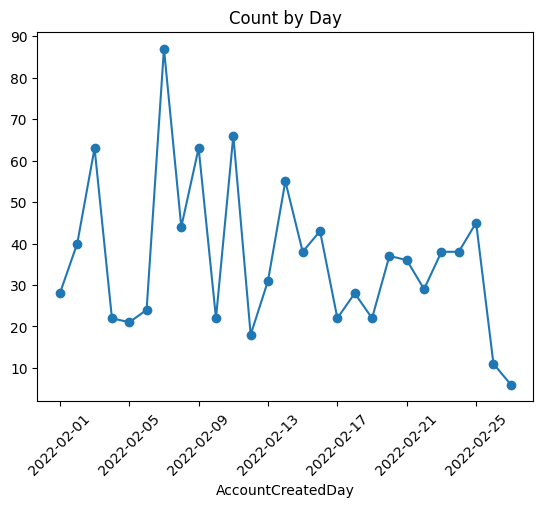

In [ ]:
acq["AccountCreatedDay"] = pd.to_datetime(acq["AccountCreatedDay"])
daily_counts = acq.groupby(acq["AccountCreatedDay"].dt.date).size()
#print(daily_counts)
daily_counts.plot(kind="line", marker="o", title="Accounts Created by Day")
plt.xticks(rotation=45)

In [4]:
usage = pd.read_csv('Case_UsageData.csv')
usage.head()

,AccountID,UsageDate,UsageDate_Key
0,00f256ff-48d6-4c60-ac2a-7c228d19434c,2022-02-24T00:00:00.0000000Z,20220224
1,00f256ff-48d6-4c60-ac2a-7c228d19434c,2022-02-25T00:00:00.0000000Z,20220225
2,00f256ff-48d6-4c60-ac2a-7c228d19434c,2022-02-26T00:00:00.0000000Z,20220226
3,00f256ff-48d6-4c60-ac2a-7c228d19434c,2022-02-27T00:00:00.0000000Z,20220227
4,00f256ff-48d6-4c60-ac2a-7c228d19434c,2022-02-28T00:00:00.0000000Z,20220228


(array([19024., 19038., 19052., 19066., 19083., 19097., 19113.]),
 [Text(19024.0, 0, '2022-02-01'),
  Text(19038.0, 0, '2022-02-15'),
  Text(19052.0, 0, '2022-03-01'),
  Text(19066.0, 0, '2022-03-15'),
  Text(19083.0, 0, '2022-04-01'),
  Text(19097.0, 0, '2022-04-15'),
  Text(19113.0, 0, '2022-05-01')])

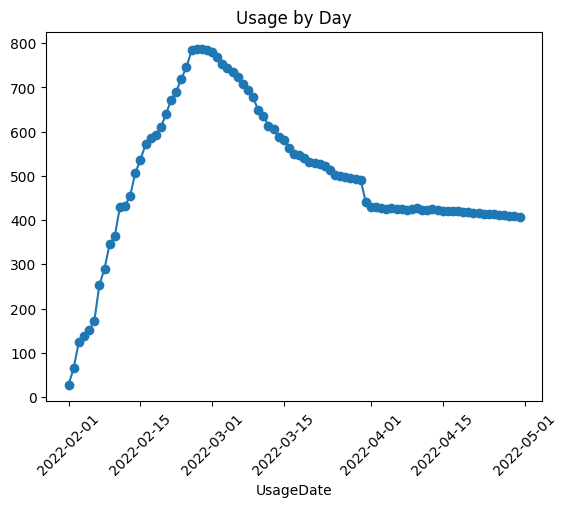

In [16]:
usage["UsageDate"] = pd.to_datetime(usage["UsageDate"])
daily_counts = usage.groupby(usage["UsageDate"].dt.date).size()
#print(daily_counts)
daily_counts.plot(kind="line", marker="o", title="Usage by Day")
plt.xticks(rotation=45)